In [3]:
import pandas as pd
from pandas import Series as sr, DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [5]:
td = pd.read_csv('train.csv')

In [13]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


male      577
female    314
Name: Sex, dtype: int64

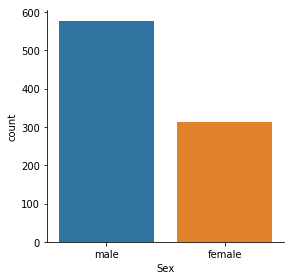

In [58]:
sns.factorplot('Sex',data=td,kind='count')
td.Sex.value_counts()

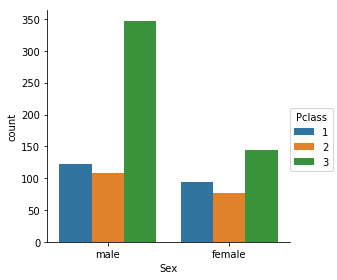

In [59]:
sns.factorplot('Sex',data=td,kind='count',hue='Pclass')

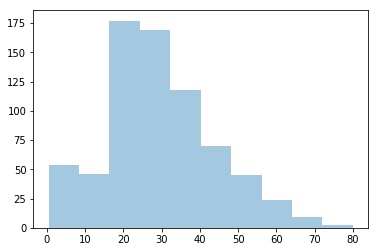

In [72]:
sns.distplot(np.array(td.Age.dropna()),bins=10,kde=False)

In [87]:
binbo=np.linspace(0,100,11)
binbo

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.])

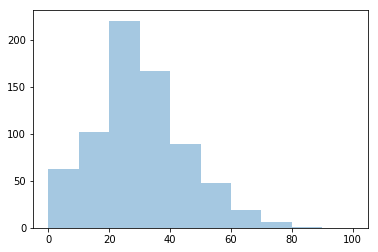

In [88]:
sns.distplot(np.array(td.Age.dropna()),bins=binbo, kde=False)

In [8]:
binbo=[0,10,20,30,40,50,60,70,80,90,100]
ct = pd.cut(list(td.Age.dropna()),binbo)
pd.value_counts(ct).sort_index()

(0, 10]       64
(10, 20]     115
(20, 30]     230
(30, 40]     155
(40, 50]      86
(50, 60]      42
(60, 70]      17
(70, 80]       5
(80, 90]       0
(90, 100]      0
dtype: int64

In [98]:
td['person'] = sr(np.where(td.Age<16,'child',td.Sex))
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


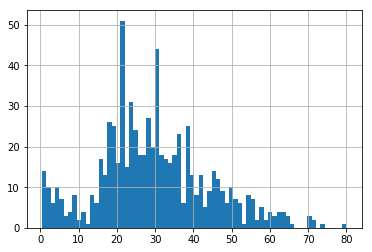

In [126]:
td['Age'].hist(bins=70)

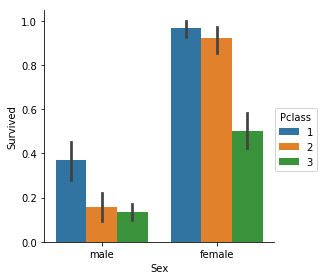

In [10]:
sns.factorplot(x='Sex',y='Survived',hue='Pclass',data=td,kind='bar')

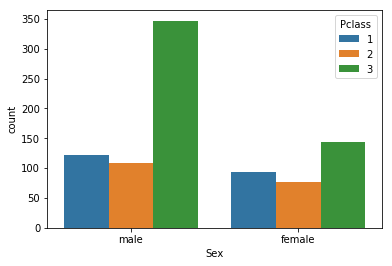

In [134]:
sns.countplot(x='Sex',data=td, hue='Pclass')

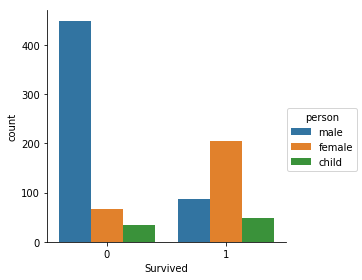

In [102]:
sns.factorplot('Survived',hue='person',data=td,kind='count')

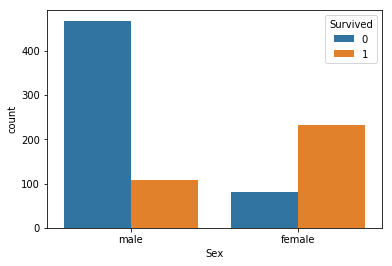

In [95]:
#Survival for male and female
sns.countplot('Sex',data=td,hue='Survived')

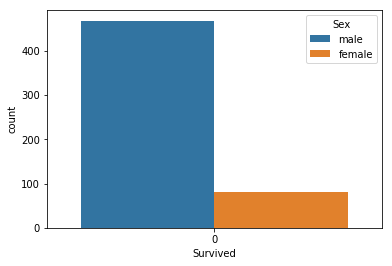

In [90]:
#Sex wise dead people
s=td.Survived[td.Survived==0]
sns.countplot(s,data=td,hue='Sex')

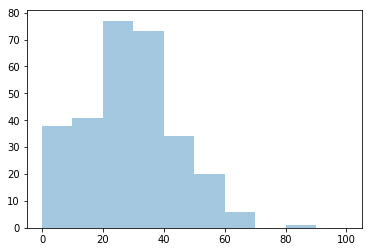

In [84]:
#Age-wise survived people (survived=1)
sns.distplot(np.array(td.Age[td.Survived==1].dropna()),bins=binbo,kde=False)

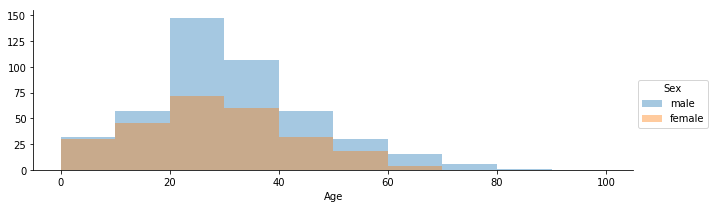

In [83]:
#Sex-wise age distribution of using histogram
fig = sns.FacetGrid(td,hue="Sex",aspect=3)
fig.map(sns.distplot,"Age",bins=binbo,kde=False).add_legend()

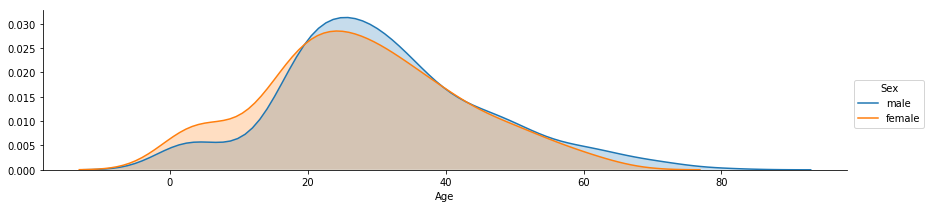

In [80]:
#Sex-wise Age distribution
fig = sns.FacetGrid(td,hue="Sex",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True).add_legend()

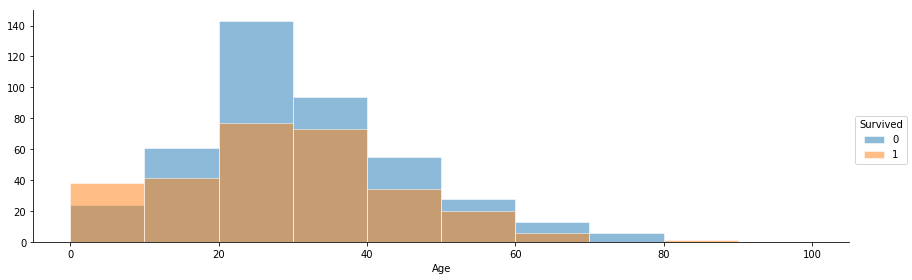

In [74]:
#Age-wise classification of survived and dies
fig = sns.FacetGrid(td,hue="Survived",aspect=3,size=4)
fig.map(plt.hist,"Age",bins=binbo,alpha=0.5,edgecolor="w").add_legend()

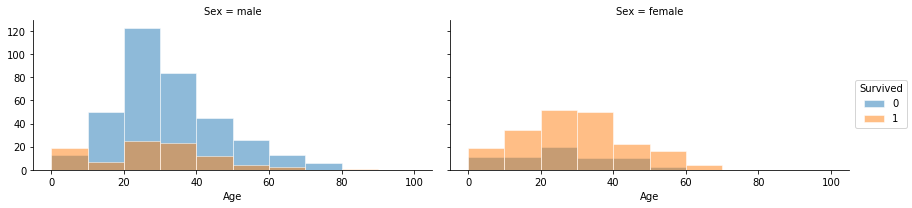

In [79]:
#Male vs Female age-wise classification of Survived and died
fig = sns.FacetGrid(td,hue="Survived",col="Sex",aspect=2)
fig.map(plt.hist,"Age",bins=binbo,alpha=0.5,edgecolor="w").add_legend()

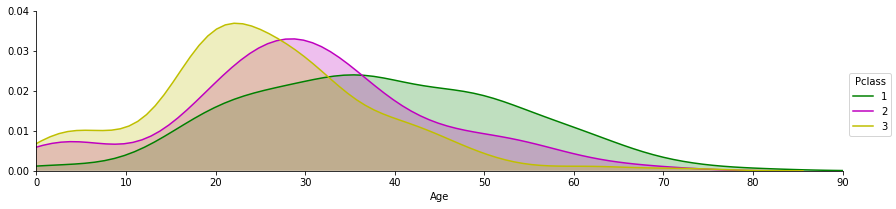

In [115]:
#Age distribution in various class
fig = sns.FacetGrid(td,hue="Pclass",aspect=4,palette={1:'g',2:'m',3:'y'})
fig.map(sns.kdeplot,"Age",shade=True).add_legend()
fig.set(ylim=(0,0.04))
fig.set(xlim=(0,90))

In [116]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


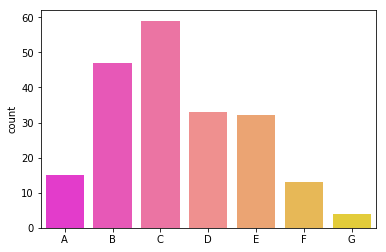

In [133]:
#cabin wise count of people
level = td.Cabin.dropna()
levels = []

for deck in level:
    levels.append(deck[0])
levels.sort()

sns.countplot([x for x in levels if x !='T'],data=td,palette='spring')
#palettes are Set1,spring,autumn,summer,winter,Blues,Greens,Reds,Purples,etc.

In [134]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


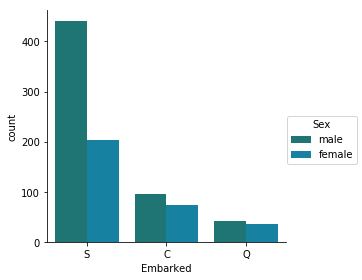

In [137]:
#Enbarkment wise male-female count
sns.factorplot('Embarked',hue='Sex',data=td,kind='count',palette='winter_d')

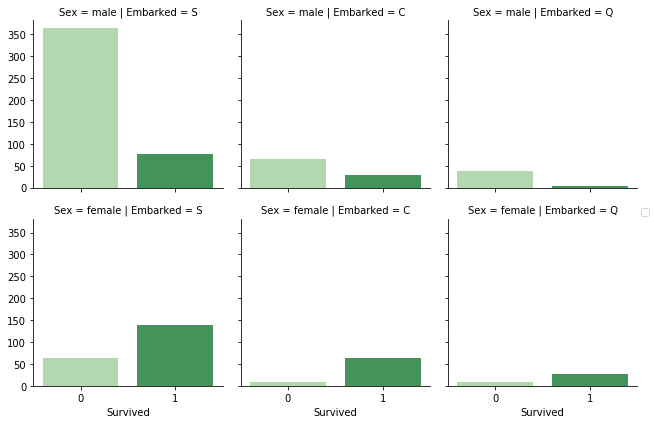

In [189]:
#survival data of males and females from each Embarkment
f = sns.FacetGrid(td,row='Sex',col='Embarked',size=3)
f.map(sns.countplot,'Survived',palette="Greens")
f.add_legend()
#max people boarded from S and much more males died than females

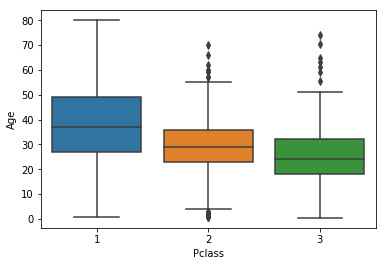

In [150]:
sns.boxplot("Pclass","Age",data=td)

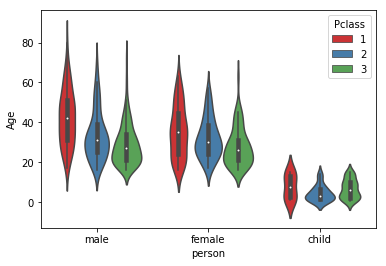

In [162]:
sns.violinplot(x="person",y="Age",hue="Pclass",data=td, palette="Set1")

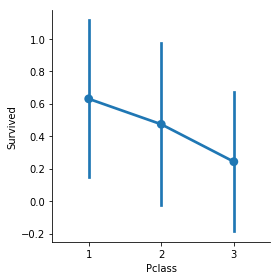

In [183]:
#class wise survival rate
sns.factorplot(x="Pclass",y="Survived",data=td,ci='sd')#sd=standard deviation #ci is 1 to 100(confidence interval)
#factorplot kind = point(default)/count/bar/box/violin

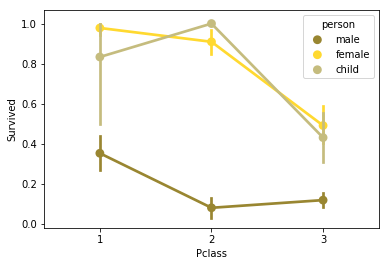

In [184]:
#class wise survival rate of male,female and children
sns.pointplot(x="Pclass",y="Survived",hue="person",data=td,palette="Set2_d")

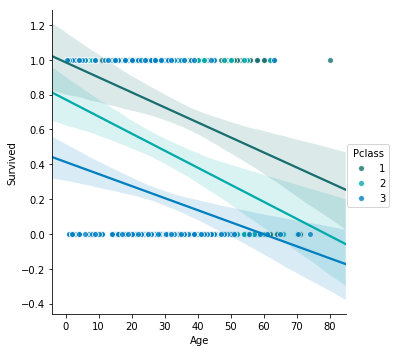

In [185]:
#regression line of Age vs survived ,class wise.See survival rates are lower of old age people and considerably low 
#of 3rd class boarders for all ages  
sns.lmplot(x='Age',y='Survived',data=td,scatter_kws={'edgecolor':'w'},hue='Pclass',palette='winter_d')

In [204]:
td['Alone'] = sr(np.where(td.Parch > 0, 'With Family','Alone'))
td['Alone'] = sr(np.where(td.SibSp > 0, 'With Family',td.Alone))
td.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


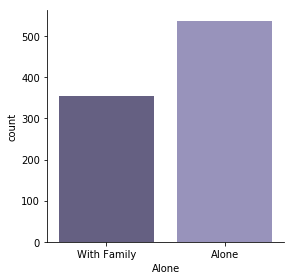

In [225]:
#count of people with and without family
sns.factorplot('Alone',data=td,kind='count',palette='Purples_d')

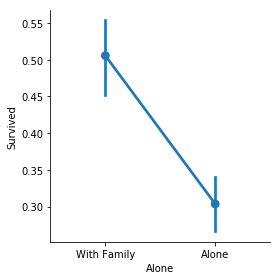

In [229]:
#count of people with and without family who survived
sns.factorplot('Alone','Survived',data=td)

In [230]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [253]:
#creating column Deck
deck = td.Cabin.dropna()
for i in deck.index:
    deck[i]=deck[i][0]
td['Deck']=deck
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,NaN


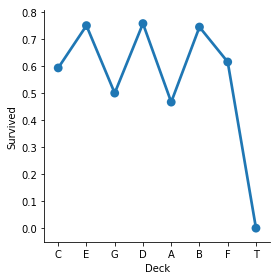

In [259]:
#survuival rate based on deck
sns.factorplot('Deck','Survived',data=td,ci=None)